# User Data EDA

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from glob import glob

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
def time_marker(text=''):
    print('[{}] {}'.format(datetime.datetime.now().time(), text))

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
font = {'size' : 50}
matplotlib.rc('font', **font)

TITLE_FONT_SIZE = 25
LABEL_FONT_SIZE = 15
TICK_FONT_SIZE  = 15

day_labels = ['MON','TUE','WED','THU','FRI','SAT','SUN']
day_labels_full = ['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY']
month_labels = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
month_labels_full = ['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']

FIG_SIZE = (15,6)
FIG_SIZE_SHORT = (15,3)
GRID_DIMS = 15

DO_WRITE_CHARTS = False

# Load User Data

In [9]:
time_marker(text='Loading Review Data...')

users = pd.DataFrame()
file_path_slug = '../clean_data/users/users_clean.csv'
file_list = glob(file_path_slug)


# Chunk Settings
chunks = list()
chunksize = 10000

for ii, file in enumerate(file_list):
    time_marker('Reading {} of {} {}...'.format(ii+1, len(file_list), file))
    num_chunks = math.ceil(sum(1 for row in open(file, 'r'))/chunksize)
    format_width = len(str(num_chunks))

    # import file in chunks
    for jj, chunk in enumerate(pd.read_csv(file, chunksize=chunksize, iterator=True, index_col=0, parse_dates=['yelping_since'])):

#         # drop reviews with missing review text
#         chunk = chunk[~chunk.text.isnull()].copy()
        
#         # lowercase text
#         chunk.text = chunk.text.str.lower()
    

        # append chunk to chunks list
        chunks.append(chunk)        
        
        if jj % math.ceil(num_chunks/10) == 0 or jj == num_chunks:
            time_marker(text='\tfinished chunk {} of {}'.format(str(jj+1).rjust(format_width), str(num_chunks).rjust(format_width)))

time_marker(text='merging to dataframe...')
users = pd.concat(chunks)

time_marker('reseting index...')
users.reset_index(inplace=True, drop=True)
time_marker(text='Complete!')


[13:51:40.607240] Loading Review Data...
[13:51:40.985255] Reading 1 of 1 ../clean_data/users/users_clean.csv...
[13:51:41.951368] 	finished chunk   1 of 119
[13:51:43.106406] 	finished chunk  13 of 119
[13:51:44.161387] 	finished chunk  25 of 119
[13:51:45.307571] 	finished chunk  37 of 119
[13:51:46.364336] 	finished chunk  49 of 119
[13:51:47.427033] 	finished chunk  61 of 119
[13:51:48.842477] 	finished chunk  73 of 119
[13:51:49.954518] 	finished chunk  85 of 119
[13:51:51.000336] 	finished chunk  97 of 119
[13:51:52.087671] 	finished chunk 109 of 119
[13:51:52.930221] merging to dataframe...
[13:51:53.990351] reseting index...
[13:51:53.993330] Complete!


In [10]:
users.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite_2008,elite_2009,elite_2010,elite_2011,elite_2012,elite_2013,elite_2014,elite_2015,elite_2016,elite_2017
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,0,0,1,1,1,1,1,1,1,1
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,1,1,1,1,1,1,1,1,1,1
2,4.72,15,1,15,5,0,1,11,8,20,...,0,0,0,0,0,0,0,0,0,0
3,3.76,9,0,9,1,0,1,4,1,11,...,0,0,0,0,0,0,0,0,1,1
4,4.23,276,0,276,59,0,8,51,169,386,...,0,0,0,0,0,0,0,0,1,1


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183362 entries, 0 to 1183361
Data columns (total 35 columns):
average_stars         1183362 non-null float64
compliment_cool       1183362 non-null int64
compliment_cute       1183362 non-null int64
compliment_funny      1183362 non-null int64
compliment_hot        1183362 non-null int64
compliment_list       1183362 non-null int64
compliment_more       1183362 non-null int64
compliment_note       1183362 non-null int64
compliment_photos     1183362 non-null int64
compliment_plain      1183362 non-null int64
compliment_profile    1183362 non-null int64
compliment_writer     1183362 non-null int64
cool                  1183362 non-null int64
fans                  1183362 non-null int64
funny                 1183362 non-null int64
name                  1182921 non-null object
review_count          1183362 non-null int64
useful                1183362 non-null int64
user_id               1183362 non-null object
yelping_since         118336

# Investigation

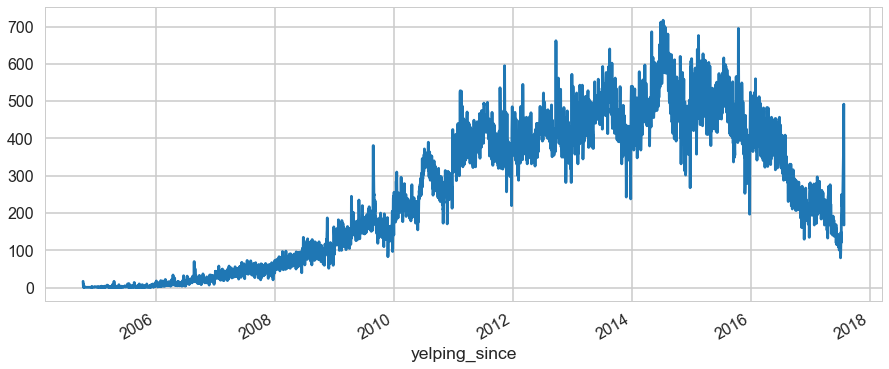

In [13]:
users.groupby('yelping_since').count()['user_id'].plot(figsize=FIG_SIZE)
plt.show()
plt.close()

# Annual Growth

In [15]:
users_df = users.copy()
users_df.drop(['user_id', 'name'], axis=1, inplace=True)
users_by_date = users_df.groupby('yelping_since').sum()
users_by_date.head(3)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite_2008,elite_2009,elite_2010,elite_2011,elite_2012,elite_2013,elite_2014,elite_2015,elite_2016,elite_2017
yelping_since,,,,,,,,,,,,,,,,,,,,,
2004-10-12,66.71,6795,725,6795,5035,161,508,2290,2932,6121,...,4,5,5,4,4,4,3,3,2,2
2004-10-13,21.90,9,1,9,6,0,5,7,0,10,...,0,0,0,0,0,0,0,0,0,0
2004-10-14,8.20,24,1,24,14,1,9,10,1,18,...,0,0,0,0,0,0,0,0,0,0


In [19]:
users_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4558 entries, 2004-10-12 to 2017-07-26
Data columns (total 32 columns):
average_stars         4558 non-null float64
compliment_cool       4558 non-null int64
compliment_cute       4558 non-null int64
compliment_funny      4558 non-null int64
compliment_hot        4558 non-null int64
compliment_list       4558 non-null int64
compliment_more       4558 non-null int64
compliment_note       4558 non-null int64
compliment_photos     4558 non-null int64
compliment_plain      4558 non-null int64
compliment_profile    4558 non-null int64
compliment_writer     4558 non-null int64
cool                  4558 non-null int64
fans                  4558 non-null int64
funny                 4558 non-null int64
review_count          4558 non-null int64
useful                4558 non-null int64
friend_count          4558 non-null int64
yelper_age            4558 non-null int64
elite_2005            4558 non-null int64
elite_2006            4558 non-nu

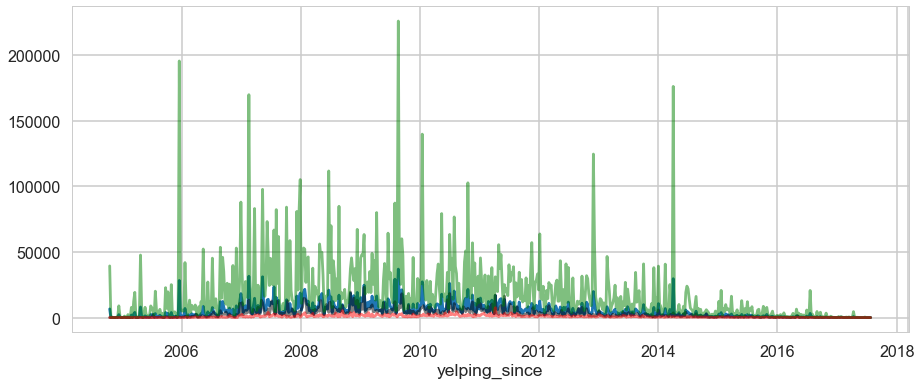

In [87]:
plt.subplots(figsize=FIG_SIZE)
ax = users_by_date.resample('W').mean().cool.plot()
users_by_date.resample('W').median().cool.plot(ax=ax, color='k', alpha=0.5)
users_by_date.resample('W').max().cool.plot(ax=ax, color='g', alpha=0.5)
users_by_date.resample('W').min().cool.plot(ax=ax, color='r', alpha=0.5)
plt.show()
plt.close()

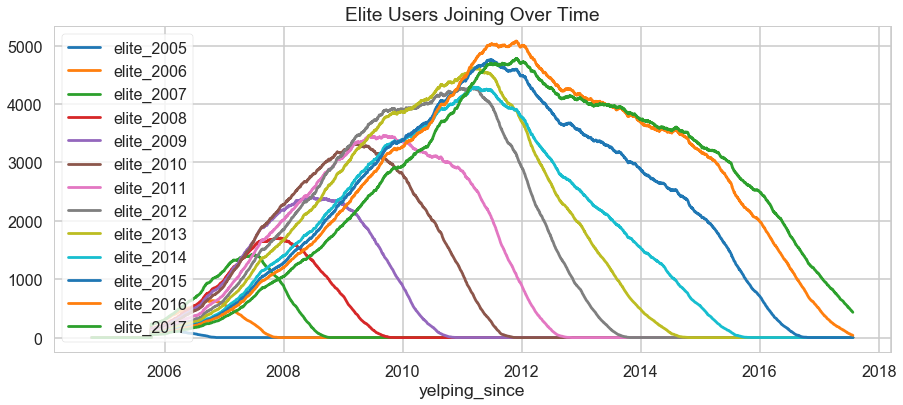

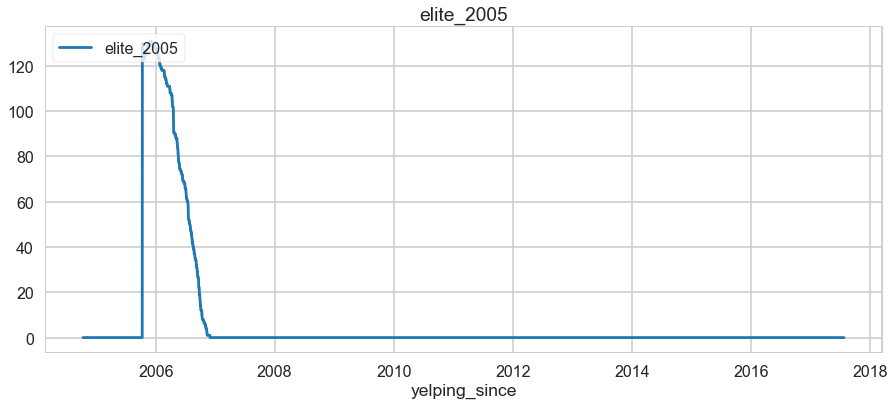

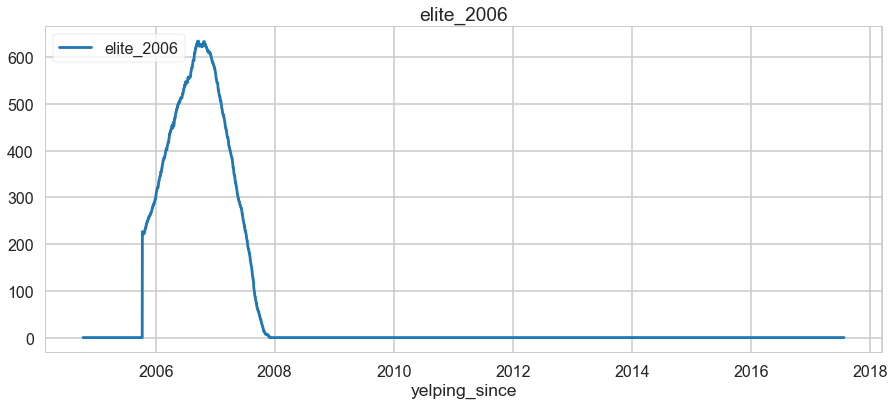

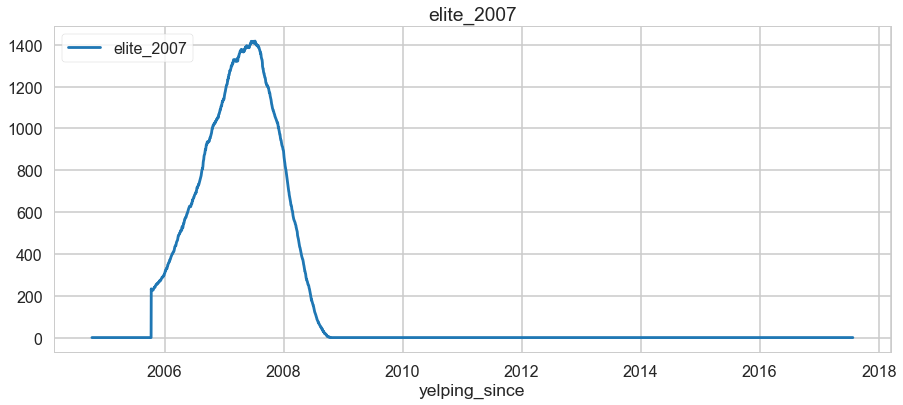

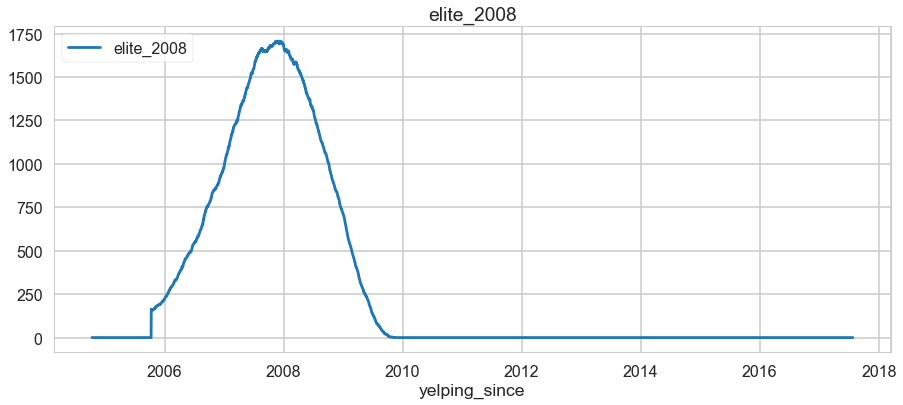

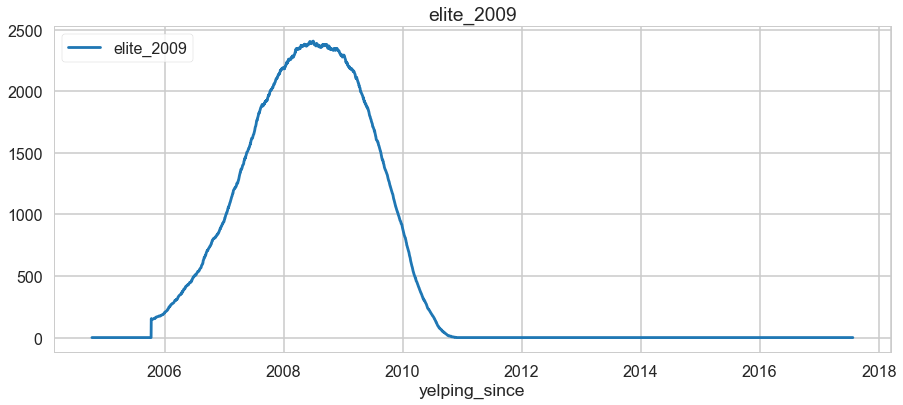

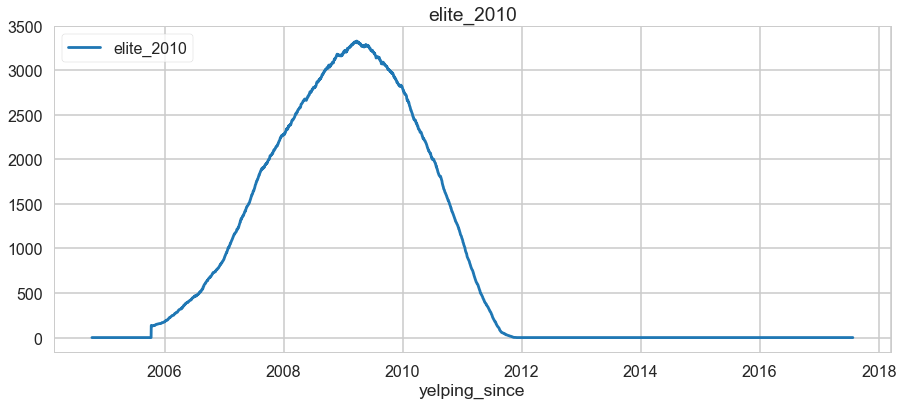

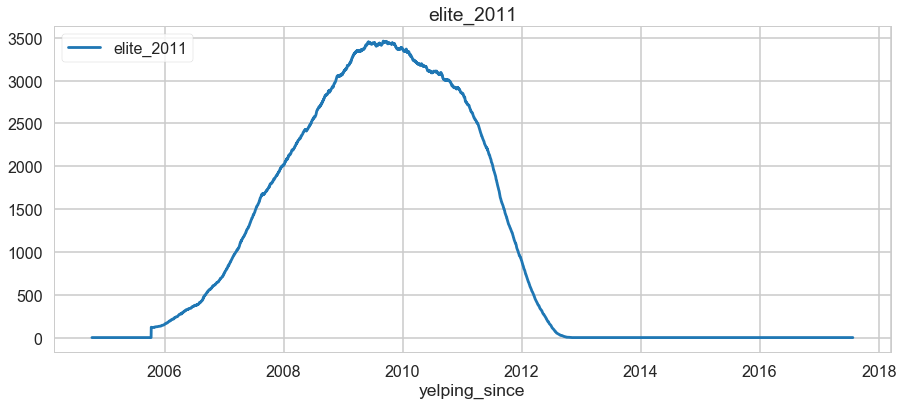

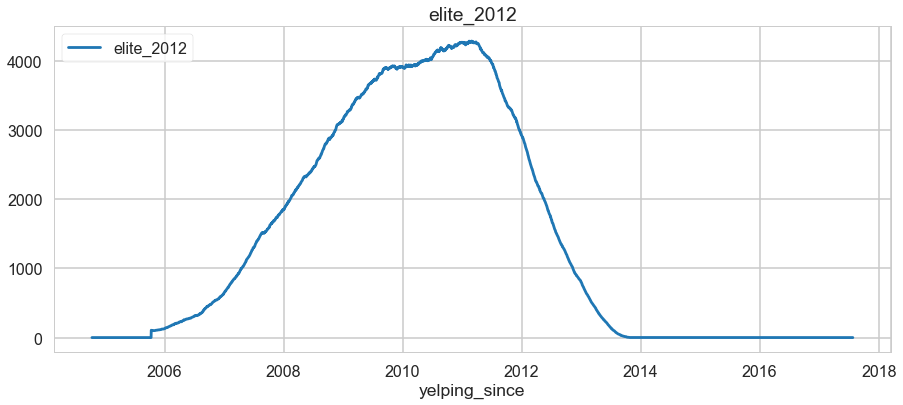

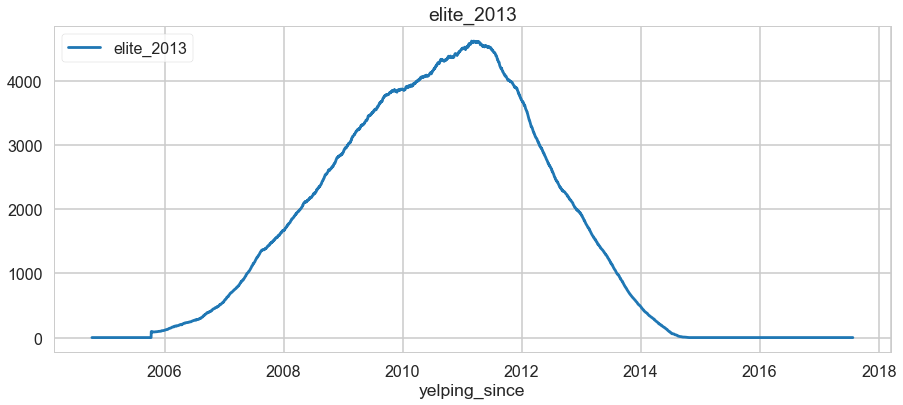

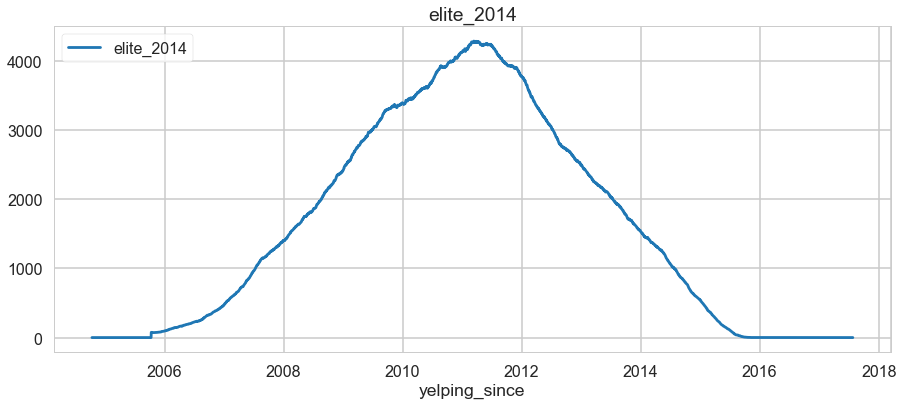

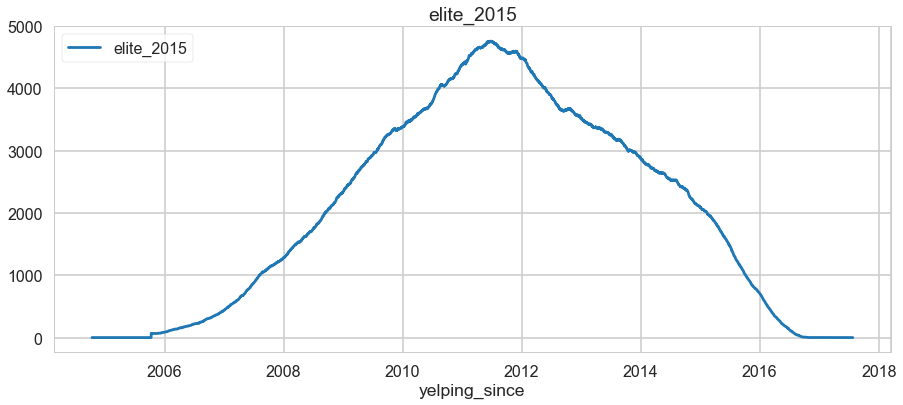

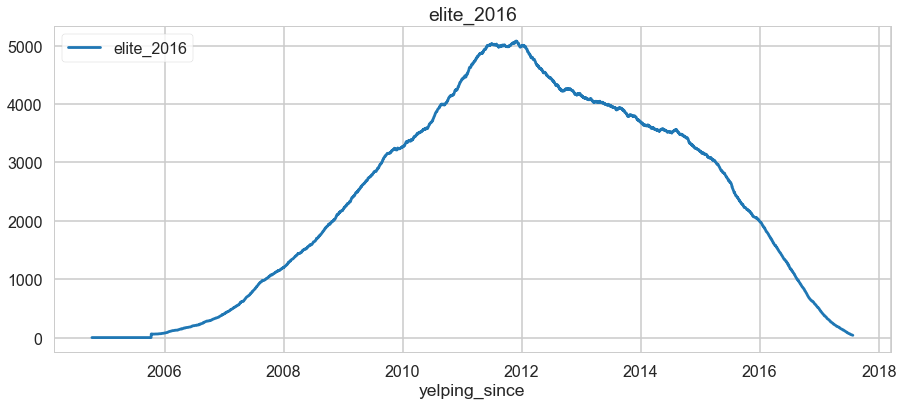

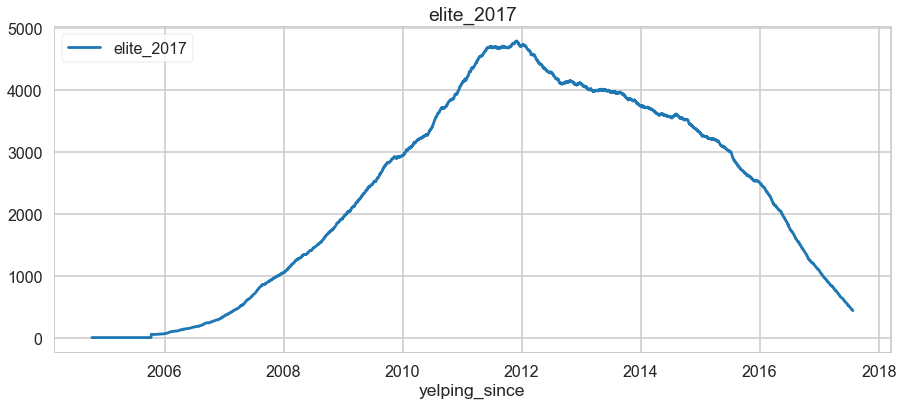

In [96]:
elite_cols = ['elite_2005', 'elite_2006', 'elite_2007', 'elite_2008', 'elite_2009', 'elite_2010', 'elite_2011', 'elite_2012', 'elite_2013', 'elite_2014', 'elite_2015', 'elite_2016', 'elite_2017']


ax = users_by_date.resample('D').sum().rolling(365).sum()[elite_cols].fillna(0).plot(figsize=FIG_SIZE)
ax.set_title('Elite Users Joining Over Time')
ax.legend(loc=2, frameon=True)
plt.show()
plt.close()


for year in elite_cols:
    ax = users_by_date[year].resample('D').sum().rolling(365).sum().fillna(0).plot(figsize=FIG_SIZE)
    ax.set_title(year)
    ax.legend(loc=2, frameon=True)
    plt.show()
    plt.close()

['elite_2005',
 'elite_2006',
 'elite_2007',
 'elite_2008',
 'elite_2009',
 'elite_2010',
 'elite_2011',
 'elite_2012',
 'elite_2013',
 'elite_2014',
 'elite_2015',
 'elite_2016',
 'elite_2017']

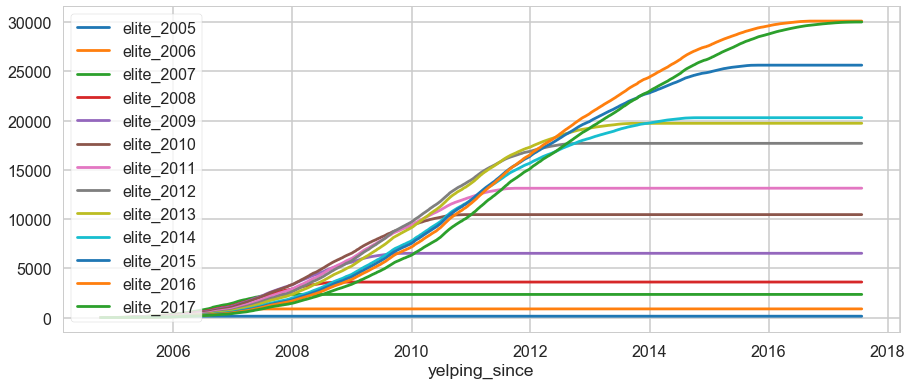

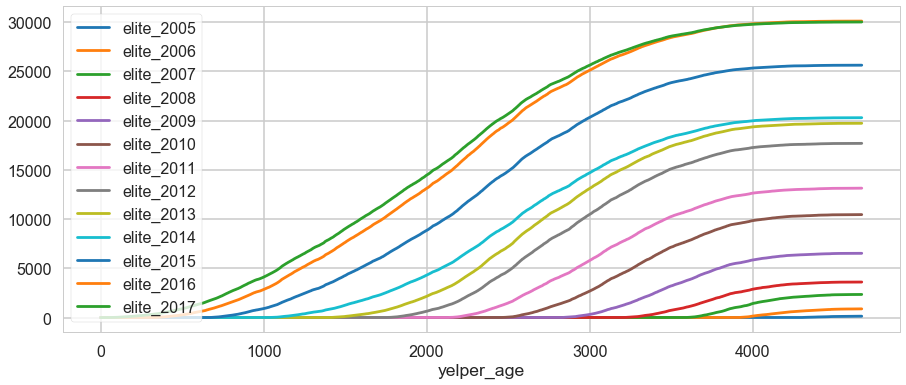

In [131]:
elite_cols = [x for x in users.columns if 'elite_' in x]

ax = users_by_date.resample('D')[elite_cols].sum().cumsum().plot(figsize=FIG_SIZE)
ax.legend(loc=2, frameon=True)
plt.show()
plt.close()

ax = users.groupby('yelper_age')[elite_cols].sum().cumsum().plot(figsize=FIG_SIZE)
ax.legend(loc=2, frameon=True)
plt.show()
plt.close()

In [ ]:
ax = sns.regplot(x='average_stars', y='yelper_age', data=users)
plt.show()
plt.close()